# Boston Housing Dataset Analysis
I will be trying to analyze and predict house prices using various ML models

## 0. Exploratory Data Analysis

### Getting Started: Importing libraries
Following libraries will be required to get started:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option("display.max_columns", 200)

### Importing dataset
We will now import our Boston Housing dataset as a Pandas dataframe.

In [3]:
df = pd.read_csv("C:/Users/kaust/OneDrive/Desktop/Learning ML/innoverse/datasets/boston-housing-dataset/BostonHousing.csv")

### Reading and Understanding the dataframe
Let's see what is actually inside the dataset

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [5]:
df.shape

(506, 14)

In [6]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'CAT. MEDV'],
      dtype='object')

In [7]:
# Checking for null values
df.isna().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


### Univariate and Bivariate Analysis
Performing such analysis will allow us to select the best features to test our model against

In [9]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305,-0.151987
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445,0.365296
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725,-0.366276
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260,0.108631
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321,-0.232502
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360,0.641265
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955,-0.191196
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929,0.118887
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626,-0.197924
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536,-0.273687


<Axes: >

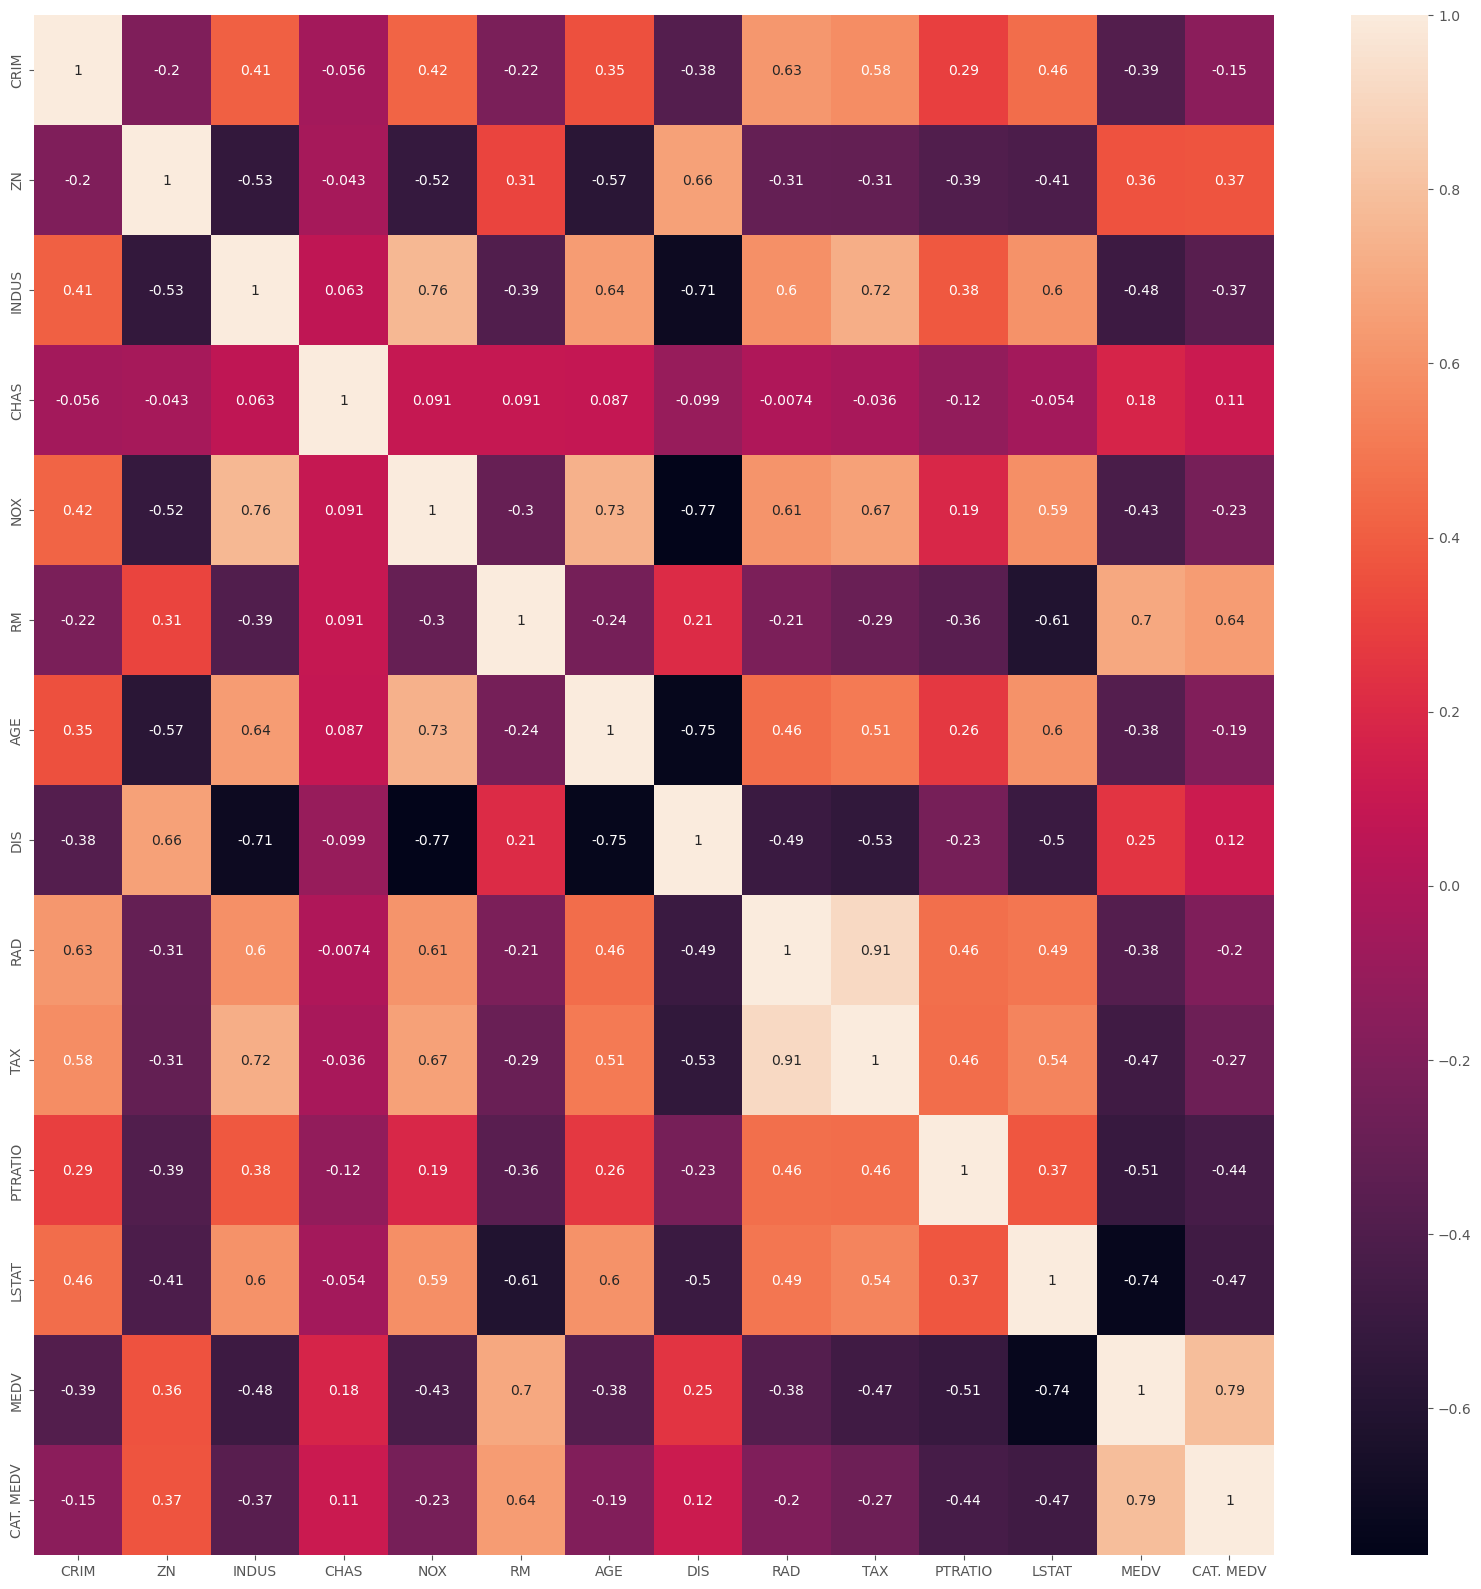

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [11]:
df = df.drop("CAT. MEDV", axis=1).copy()

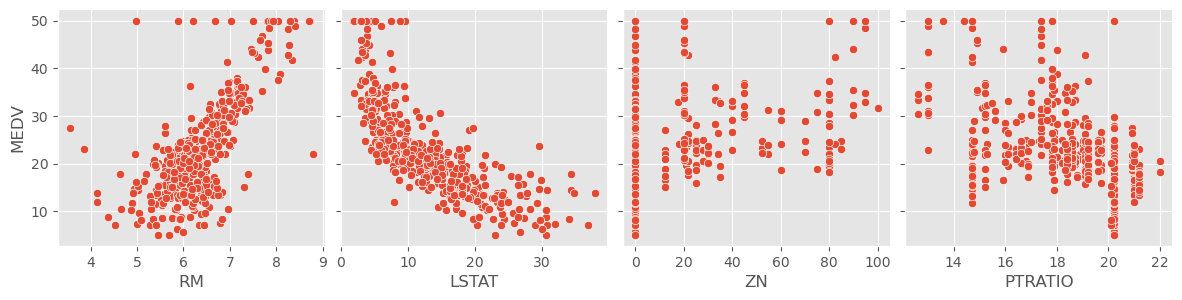

In [12]:
sns.pairplot(df, x_vars=['RM', 'LSTAT', 'ZN', 'PTRATIO'], y_vars='MEDV', height=3, kind='scatter')
plt.show()

## 1. Linear Regression
Based on the above data analysis, i will be using the following four features to test using a linear regression model:
* RM: Average number of rooms per dwelling
* LSTAT: % lower status of population
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* PTRATIO: pupil-teacher ratio by town

### Selecting Features
I will now select the features i want to use in Python.

In [13]:
requiredFeatures = ["RM","LSTAT","ZN","PTRATIO"]
x = df[requiredFeatures].values
y = df['MEDV'].values

np.random.seed(40)
msk = np.random.rand(len(df)) < 0.8
x_train, x_test = x[msk], x[~msk]
y_train, y_test = y[msk], y[~msk]

### Building the Cost Function
The cost function gives me the loss or difference between the model's predicted output and other data points

In [14]:
def costFunction(x,y,w,b):
    m = len(y)
    predictions = x @ w + b
    cost = ((1/(2*m)) * np.sum((predictions - y) ** 2))
    return cost

### Building the Gradient Function
I will be using the Gradient Descent method to train the model, which first requires the following computation

In [15]:
def GradientFunc(x,y,w,b):
    m = len(y)
    predictions = x @ w + b
    error = predictions - y
    dc_dw = (1/m) * (x.T @ error)
    dc_db = (1/m) * np.sum(error)

    return dc_dw, dc_db

### The Gradient Descent Algo
The gradient descent algo iterates for a certain number of epochs where it continuously updates the weights and biases until we reach a global minima.

In [16]:
def GradientDescent(x, y, alpha, epochs):
    w = np.zeros(x.shape[1])
    b = 0

    for i in range(epochs):
        dc_dw, dc_db = GradientFunc(x,y,w,b)

        w = w - (alpha) * dc_dw
        b = b - (alpha) * dc_db

    
    return w,b

### Training the Model
I will now train the linear regression model as follows

In [17]:
learningRate = 0.0001
iterations = 100000
finalW, finalB = GradientDescent(x_train, y_train, learningRate, iterations)

print("Final weights: ", finalW)
print("Final bias: ", finalB)


Final weights:  [ 6.15400830e+00 -5.30517904e-01 -3.99283157e-03 -5.72386524e-01]
Final bias:  1.1590584024639023


### Checking and verifiying trained model with graphs

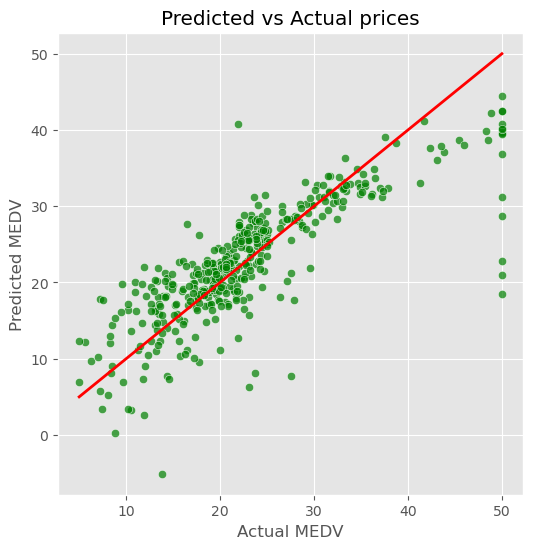

In [18]:
y_pred_train = x_train @ finalW + finalB
plt.figure(figsize=(6,6))
sns.scatterplot(x = y_train, y = y_pred_train, alpha=0.7, color='green')
plt.plot([y_train.min(), y_train.max()],
         [y_train.min(), y_train.max()],
         color='red', lw=2)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Predicted vs Actual prices")
plt.show()

In [19]:
y_pred_test = x_test @ finalW + finalB

In [20]:
mseTest = np.mean((y_pred_test - y_test) ** 2)
rmseTest = np.sqrt(mseTest)

ssTotal = np.sum((y_test - np.mean(y_test)) ** 2)
ssRes = np.sum((y_test - y_pred_test) ** 2)
r2Test = 1 - (ssRes/ssTotal)

print(f"MSE: {mseTest}")
print(f"RMSE: {rmseTest}")
print(f"R2: {r2Test}")

MSE: 26.9531377873819
RMSE: 5.1916411458595535
R2: 0.6165289747594478


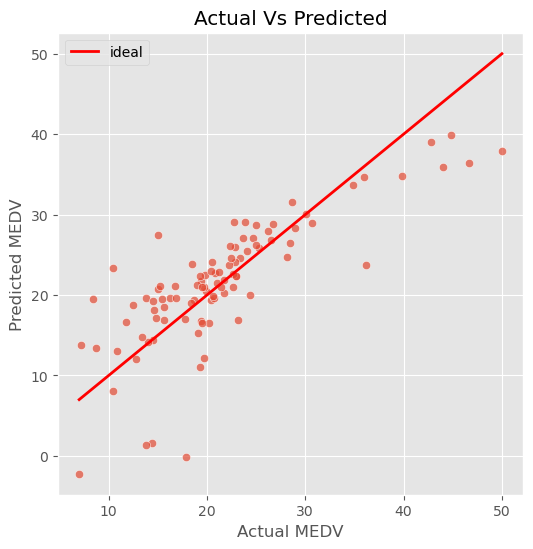

In [21]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = y_test, y = y_pred_test, alpha = 0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red',lw=2,label='ideal')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual Vs Predicted")
plt.legend()
plt.show()